# Introduction to the vine copula (`Vinecop`) API

## Import the libraries

In [1]:
import pyvinecopulib as pv

import numpy as np

## A first vine copula

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_types family rotation parameters  df   tau 
   1    1                  3, 1                             c, c    BB1       90 3.00, 2.00 2.0 -0.80 
   1    2                  2, 1                             c, c    BB1       90 3.00, 2.00 2.0 -0.80 
   2    1                  3, 2                      1      c, c    BB1       90 3.00, 2.00 2.0 -0.80 



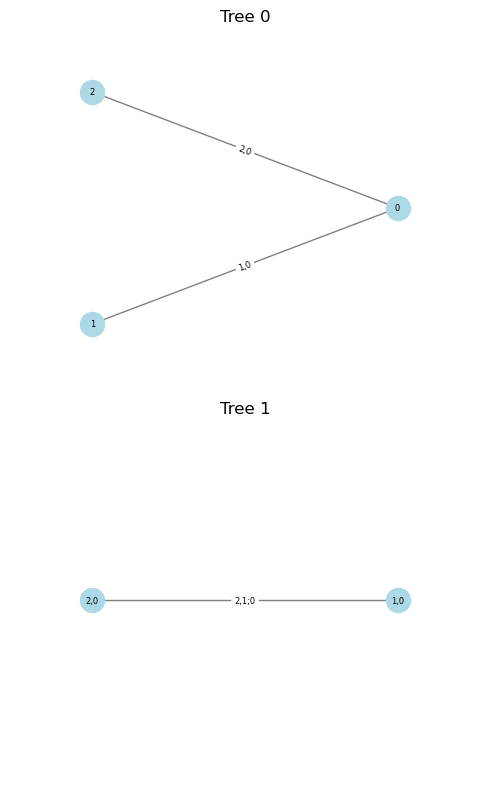

In [2]:
# Specify pair-copulas
bicop = pv.Bicop(pv.bb1, 90, parameters=np.array([[3.0], [2.0]]))
pcs = [[bicop, bicop], [bicop]]

# Specify R-vine matrix
mat = np.array([[1, 1, 1], [2, 2, 0], [3, 0, 0]])

# Set-up a vine copula
cop = pv.Vinecop.from_structure(matrix=mat, pair_copulas=pcs)
print(cop)
cop.plot()

## Showcase some methods

In [3]:
u = cop.simulate(n=10, seeds=[1, 2, 3])
fcts = [
  cop.pdf,
  cop.rosenblatt,
  cop.inverse_rosenblatt,
  cop.loglik,
  cop.aic,
  cop.bic,
]
[f(u) for f in fcts]

[array([ 38.2942697 ,  52.8473494 , 183.65461931,  36.9527167 ,
          7.16001579,  14.15151805, 693.73724148,  10.40075319,
        200.77188365, 117.39210389]),
 array([[0.39834572, 0.55248667, 0.8346452 ],
        [0.1638618 , 0.03952828, 0.8170847 ],
        [0.14649436, 0.36602719, 0.16910484],
        [0.90118677, 0.48023317, 0.11345478],
        [0.61664802, 0.3370985 , 0.06016371],
        [0.62193432, 0.19787956, 0.12286857],
        [0.98701895, 0.76550606, 0.34747154],
        [0.6902412 , 0.85523898, 0.78638305],
        [0.20454371, 0.24959629, 0.55338439],
        [0.13685699, 0.17627362, 0.10872534]]),
 array([[0.39834572, 0.61612757, 0.57211478],
        [0.1638618 , 0.8532701 , 0.82541445],
        [0.14649436, 0.88204652, 0.82745691],
        [0.90118677, 0.04913159, 0.21760103],
        [0.61664802, 0.32505571, 0.42182647],
        [0.62193432, 0.29848552, 0.44384955],
        [0.98701895, 0.00394023, 0.08398199],
        [0.6902412 , 0.29659508, 0.30017289],
    

## Different ways to fit a copula (when the families and structure are known)...

In [4]:
u = cop.simulate(n=1000, seeds=[1, 2, 3])

# Define first an object to control the fits:
#    - pv.FitControlsVinecop objects store the controls
#    - here, we only restrict the parametric family
#    - see help(pv.FitControlsVinecop) for more details
controls = pv.FitControlsVinecop(family_set=[pv.bb1])
print(controls)

# Create a new object an select family and parameters by fitting to data
cop2 = pv.Vinecop.from_structure(matrix=mat, pair_copulas=pcs)
cop2.select(data=u, controls=controls)
print(cop2)

# Otherwise, create directly from data
cop2 = pv.Vinecop.from_data(data=u, matrix=mat, controls=controls)
print(cop2)

<pyvinecopulib.FitControlsVinecop>
Family set: BB1
Parametric method: mle
Nonparametric method: constant
Nonparametric multiplier: 1
Weights: no
Selection criterion: bic
Preselect families: yes
mBIC prior probability: 0.9
Truncation level: none (default)
Tree criterion: tau
Threshold: 0
Select truncation level: no
Select threshold: no
Select families: yes
Show trace: no
Number of threads: 1
MST algorithm: mst_prim

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_types family rotation parameters  df   tau 
   1    1                  3, 1                             c, c    BB1       90 2.84, 2.02 2.0 -0.80 
   1    2                  2, 1                             c, c    BB1       90 2.81, 2.01 2.0 -0.79 
   2    1                  3, 2                      1      c, c    BB1       90 3.07, 2.05 2.0 -0.81 

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var

## When nothing is known, there are also two ways to fit a copula...

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_types family rotation parameters  df   tau 
   1    1                  2, 1                             c, c    BB1       90 2.81, 2.01 2.0 -0.79 
   1    2                  1, 3                             c, c    BB6       90 1.49, 3.96 2.0 -0.80 
   2    1                  2, 3                      1      c, c    BB1      270 2.94, 2.02 2.0 -0.80 

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_types family rotation parameters  df   tau 
   1    1                  2, 1                             c, c    BB1       90 2.81, 2.01 2.0 -0.79 
   1    2                  1, 3                             c, c    BB6       90 1.49, 3.96 2.0 -0.80 
   2    1                  2, 3                      1      c, c    BB1      270 2.94, 2.02 2.0 -0.80 



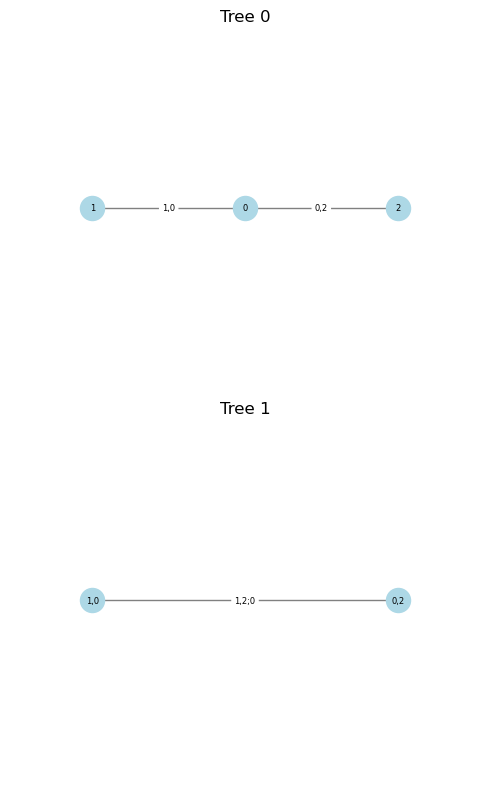

In [5]:
# Create a new object and select strucutre, family, and parameters
cop3 = pv.Vinecop(d=3)
cop3.select(data=u)
print(cop3)

# Otherwise, create directly from data
cop3 = pv.Vinecop.from_data(data=u)
print(cop3)
cop3.plot()

## C-vine structures

<pyvinecopulib.Vinecop> Vinecop model with 4 variables
tree edge conditioned variables conditioning variables var_types       family rotation parameters  df  tau 
   1    1                  4, 1                             c, c     Gaussian        0       0.50 1.0 0.33 
   1    2                  3, 1                             c, c      Clayton        0       3.00 1.0 0.60 
   1    3                  2, 1                             c, c      Student        0 0.40, 4.00 2.0 0.26 
   2    1                  4, 2                      1      c, c Independence                         0.00 
   2    2                  3, 2                      1      c, c     Gaussian        0       0.50 1.0 0.33 
   3    1                  4, 3                   2, 1      c, c     Gaussian        0       0.00 1.0 0.00 



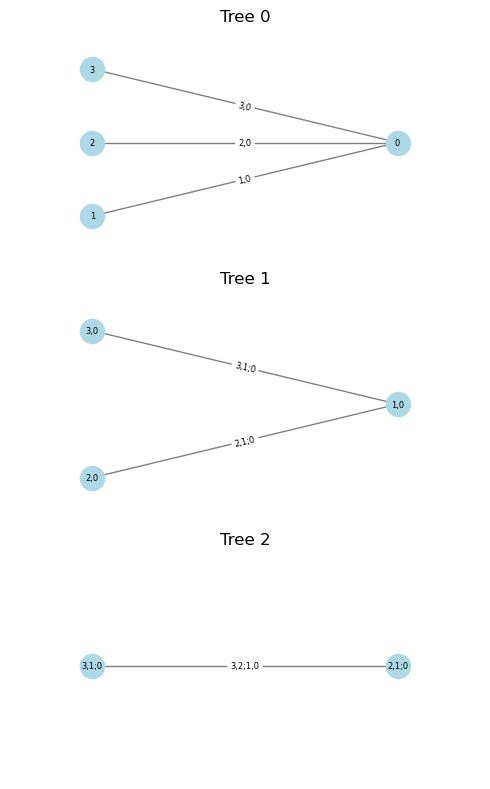

In [6]:
# create a C-vine structure with root node 1 in first tree, 2 in second, ...
cvine = pv.CVineStructure([4, 3, 2, 1])
# specify pair-copulas in every tree
tree1 = [
  pv.Bicop(pv.gaussian, 0, np.array([[0.5]])),
  pv.Bicop(pv.clayton, 0, np.array([[3.0]])),
  pv.Bicop(pv.student, 0, np.array([[0.4], [4]])),
]
tree2 = [
  pv.Bicop(pv.indep),
  pv.Bicop(pv.gaussian, 0, np.array([[0.5]])),
]
tree3 = [pv.Bicop(pv.gaussian)]

# instantiate C-vine copula model
cop = pv.Vinecop.from_structure(
  structure=cvine, pair_copulas=[tree1, tree2, tree3]
)
print(cop)
cop.plot()